In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report


In [3]:
np.random.seed(42)
n_samples = 200
x= np.random.rand(n_samples, 2) * 10
y = (x[:,0] * 1.5 + x[:,1] >15).astype(int)  # this line creastes a binary target variable which is 1 if the sum of the two features is greater than 15,and 0 otherwise 


In [9]:
df = pd.DataFrame(x, columns=['Age', 'Salary'])
df ['Purchase'] = y

x_train, x_test, y_train, y_test  = train_test_split(df[['Age','Salary']], df['Purchase'], test_size=0.2, random_state=42)


#Train logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Accuracy :" , accuracy_score(y_test, y_pred))
print("precision_score: ", precision_score(y_test, y_pred))

print("\n Classification report ", classification_report(y_test, y_pred))




Accuracy : 1.0
precision_score:  1.0

 Classification report                precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [10]:
import matplotlib.pyplot as plt


e:\pythonAi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


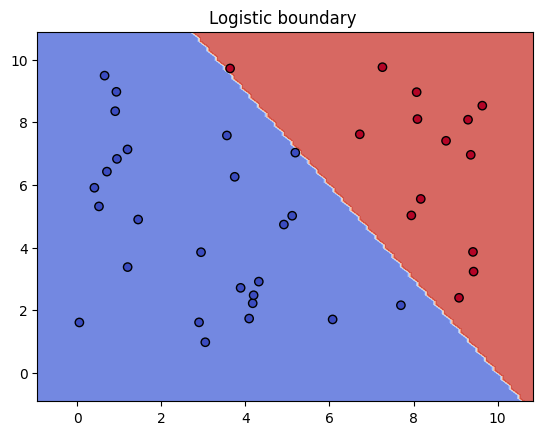

In [13]:
x_min , x_max = x[:,0].min() -1 , x[:,0].max()+1
y_min , y_max = x[:,1].min() -1 , x[:,1].max()+1
xx , yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))


# predict probability 
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.8, cmap="coolwarm")

plt.scatter(x_test['Age'], x_test['Salary'], c=y_test, edgecolors='k', marker='o', label='Test Data', cmap="coolwarm")
plt.title("Logistic boundary ")
plt.show()